<a href="https://colab.research.google.com/github/fahmi143/Karst-2.0/blob/NEW/Karst2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import imageio as iio
from PIL import Image
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D

In [66]:
class_names= ['Dendritic','Sinkhole']
image_size=(64,64)
batch_size=3



In [68]:
#Data Augmentation
train_ds = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_ds = ImageDataGenerator(rescale=1./255)
test_ds = ImageDataGenerator(rescale=1./255)

In [98]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# make 32 feature detectors with a size of 3x3
# choose the input-image's format to be 64x64 with 3 channels
classifier.add(Conv2D(16, (3, 3), input_shape=(64,64, 3), activation="relu"))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third  convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(activation="relu", units=128))
classifier.add(Dense(activation="sigmoid", units=1))

# Compiling the CNN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting to CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/KarstImages/TRAIN",
        target_size=(64, 64),
        batch_size=5,
        class_mode='binary')

validation_set= validation_datagen.flow_from_directory("/content/drive/MyDrive/KarstImages/VALIDATION",
        target_size=(64, 64),
        batch_size=5,
        class_mode='binary')

test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/KarstImages_V2/TEST",
        target_size=(64, 64),
        batch_size=5,
        class_mode='binary')
# finally start computation
# to improve the model accuracy you can increase the number of steps_per_epoch to e.g. 8000
# increase the number of epochs to 5-25
# increase the validation steps
# this parametters allow for the model to optimize

#result = classifier.fit(training_set,
                         #steps_per_epoch = (3 / 3),
                         #epochs = 25,
                         #validation_data = val_ds,
                         #validation_steps = 25)

results=classifier.fit(
        training_set,
        steps_per_epoch=(5/3),
        epochs=50,
        validation_data=validation_set,
        verbose=1)



Found 16 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 9 images belonging to 2 classes.
Epoch 1/50
1/1 [==============================] - 2s 671ms/step - loss: 0.8798 - accuracy: 0.3000 - val_loss: 0.7056 - val_accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 382ms/step - loss: 0.5870 - accuracy: 0.8000 - val_loss: 1.1388 - val_accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 388ms/step - loss: 0.9630 - accuracy: 0.4000 - val_loss: 0.9422 - val_accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 401ms/step - loss: 0.6646 - accuracy: 0.6000 - val_loss: 0.8036 - val_accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 345ms/step - loss: 0.7023 - accuracy: 0.5000 - val_loss: 0.7306 - val_accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 297ms/step - loss: 0.6874 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.3333
Epoch 7/50
1/1 [==========================

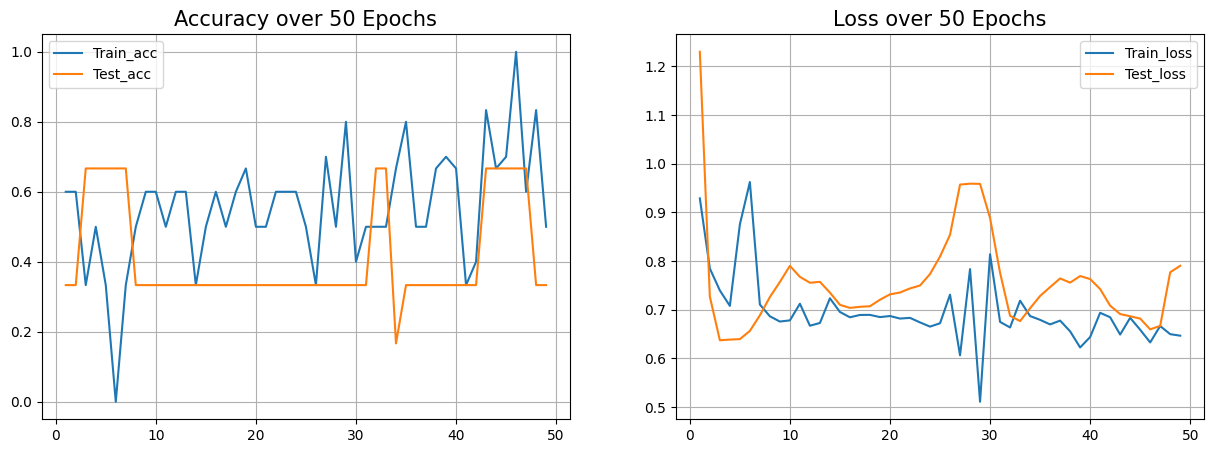

In [93]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()

plot_acc_loss(results,50)

In [34]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [94]:
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)

{'Dendritic': 0, 'Sinkhole': 1}


Populating the interactive namespace from numpy and matplotlib
1/1 [==============================] - 0s 215ms/step


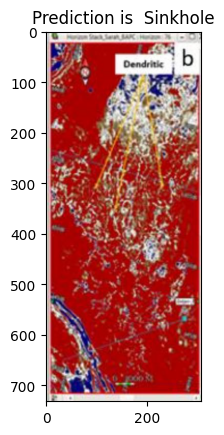

In [96]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras.utils as image
img=mpimg.imread('/content/drive/MyDrive/KarstImages/TEST/7.JPG')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/drive/MyDrive/KarstImages/TEST/7.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'Sinkhole'
else:
    prediction = 'Dendritic'

#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )


In [85]:
test_loss, test_acc = classifier.evaluate(test_set, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.7434 - accuracy: 0.4444 - 158ms/epoch - 158ms/step

Test accuracy: 0.4444444477558136


In [158]:
import numpy as np
import keras.utils as image
from keras.utils import load_img
test_image = image.load_img('/content/drive/MyDrive/KarstImages/TEST/7.JPG', target_size=(200,200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
res = model.predict(test_image)
print(train_ds.class_indices)
if res[0][0] == 1:
        pred = "Sinkhole"
else:
        pred = "Dendritic"
print(pred)

InvalidArgumentError: ignored

In [117]:
preds = model.predict(test_ds)
#if using softmax activation on output layer
predicted_labels  = np.argmax(preds,axis=1)
#Accessing classnames with predicted clases
final_predictions = [class_names[i] for i in predicted_labels]

3/3 [==============================] - 0s 47ms/step
